In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

In [14]:
x = np.linspace(-24.9, 25.0, 500)
x

array([-24.9, -24.8, -24.7, -24.6, -24.5, -24.4, -24.3, -24.2, -24.1,
       -24. , -23.9, -23.8, -23.7, -23.6, -23.5, -23.4, -23.3, -23.2,
       -23.1, -23. , -22.9, -22.8, -22.7, -22.6, -22.5, -22.4, -22.3,
       -22.2, -22.1, -22. , -21.9, -21.8, -21.7, -21.6, -21.5, -21.4,
       -21.3, -21.2, -21.1, -21. , -20.9, -20.8, -20.7, -20.6, -20.5,
       -20.4, -20.3, -20.2, -20.1, -20. , -19.9, -19.8, -19.7, -19.6,
       -19.5, -19.4, -19.3, -19.2, -19.1, -19. , -18.9, -18.8, -18.7,
       -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18. , -17.9, -17.8,
       -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17. , -16.9,
       -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16. ,
       -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1,
       -15. , -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2,
       -14.1, -14. , -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3,
       -13.2, -13.1, -13. , -12.9, -12.8, -12.7, -12.6, -12.5, -12.4,
       -12.3, -12.2,

In [15]:
def relu(z):
    return np.maximum(0, z)

In [16]:
y = relu(x)

In [17]:
coeffs_cheb = chebfit(x, y, deg=4)

In [18]:
coeffs = cheb2poly(coeffs_cheb)
coeffs

array([ 1.46478516e+00,  4.99531244e-01,  3.28130250e-02,  1.75007000e-06,
       -2.62510500e-05])

In [19]:
data = x[:, None] ** np.arange(coeffs.shape[0])

In [20]:
relu_approx = data.dot(coeffs[:, None])

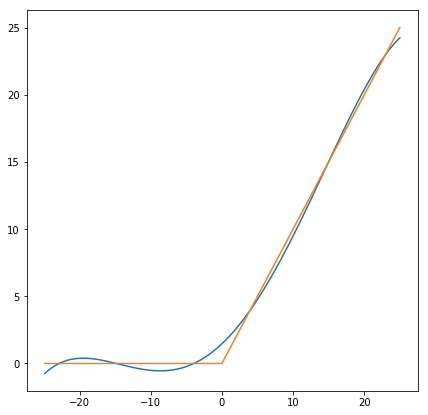

In [21]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)

In [10]:
x_enc = EA(x[:, None], True)

In [11]:
x_relu = x_enc.relu()

In [12]:
relu_vals = x_relu.values()

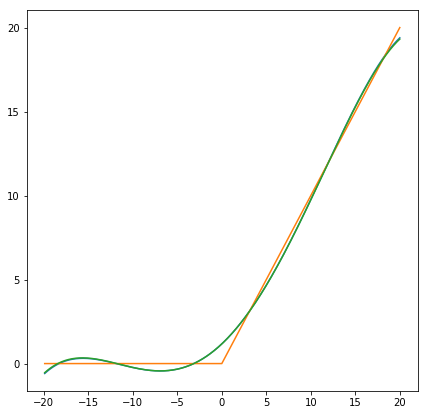

In [13]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx)
plt.plot(x, y)
plt.plot(x, relu_vals)